In [1]:
import pandas as pd

# โหลดข้อมูล
df = pd.read_excel("demo_stock.xlsx")

# ตั้งชื่อคอลัมน์ใหม่
df.columns = [
    "วันที่", "ราคาเปิด", "ราคาสูงสุด", "ราคาต ่าสุด", "ราคาเฉลี่ย", "ราคาปิด",
    "เปลี่ยนแปลง", "เปลี่ยนแปลง(%)", "ปริมาณ(พันหุ้น)", "มูลค่า(ล้านบาท)",
    
    "SET Index", "SET เปลี่ยนแปลง(%)"
]

# ฟังก์ชันแปลงวันที่ไทย
thai_months = {
    "ม.ค.": "01", "ก.พ.": "02", "มี.ค.": "03", "เม.ย.": "04",
    "พ.ค.": "05", "มิ.ย.": "06", "ก.ค.": "07", "ส.ค.": "08",
    "ก.ย.": "09", "ต.ค.": "10", "พ.ย.": "11", "ธ.ค.": "12"
}

def convert_thai_date(thai_date_str):
    for th, num in thai_months.items():
        if th in thai_date_str:
            day, month_th, year_th = thai_date_str.replace(",", "").split()
            month = thai_months[month_th]
            year = int(year_th) - 543
            return f"{year}-{month}-{int(day):02d}"
    return None

# แปลงวันที่ + ลบ row ที่ไม่ใช่ข้อมูล
df = df[~df["วันที่"].isna() & ~df["วันที่"].astype(str).str.contains("วันที่")]
df["วันที่"] = df["วันที่"].apply(convert_thai_date)
df["วันที่"] = pd.to_datetime(df["วันที่"])
df = df.dropna()

# ตั้ง index ให้เริ่มที่ 1
df.index = range(1, len(df) + 1)

# แสดงผล
df.head(5)

,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต ่าสุด,ราคาเฉลี่ย,ราคาปิด,เปลี่ยนแปลง,เปลี่ยนแปลง(%),ปริมาณ(พันหุ้น),มูลค่า(ล้านบาท),SET Index,SET เปลี่ยนแปลง(%)
1,2025-05-16,120.5,122.5,120.5,121.76,122.0,1.0,0.83,9137.83,1112.59,1176.36,0.25
2,2025-05-15,120.5,122.0,120.5,121.23,121.0,0.0,0.00,8810.93,1068.18,1173.37,-0.55
3,2025-05-14,122.0,122.0,121.0,121.50,121.0,-1.5,-1.22,9366.29,1138.01,1179.81,-0.78
4,2025-05-13,120.0,122.5,120.0,121.49,122.5,2.5,2.08,19287.03,2343.16,1189.14,0.18
5,2025-05-09,119.5,120.5,119.0,119.94,120.0,0.0,0.00,5871.20,704.17,1187.06,-0.73


In [2]:
print(df["ราคาปิด"].describe())
print(df[df["ราคาปิด"] == df["ราคาปิด"].max()])
print(df[["ราคาปิด", "SET Index"]].corr())

count    109.000000
mean     121.275229
std        3.666974
min      112.000000
25%      118.500000
50%      121.500000
75%      124.500000
max      127.500000
Name: ราคาปิด, dtype: float64
       วันที่  ราคาเปิด  ราคาสูงสุด  ราคาต ่าสุด  ราคาเฉลี่ย  ราคาปิด  \
61 2025-02-13     127.0       128.0        126.0      127.08    127.5   
70 2025-01-30     127.0       127.5        126.5      127.01    127.5   

    เปลี่ยนแปลง  เปลี่ยนแปลง(%)  ปริมาณ(พันหุ้น)  มูลค่า(ล้านบาท)  SET Index  \
61          0.5            0.39         15065.18          1914.50    1245.61   
70          1.0            0.79          6969.14           885.15    1262.07   

    SET เปลี่ยนแปลง(%)  
61               -1.32  
70               -1.92  
            ราคาปิด  SET Index
ราคาปิด    1.000000  -0.100459
SET Index -0.100459   1.000000


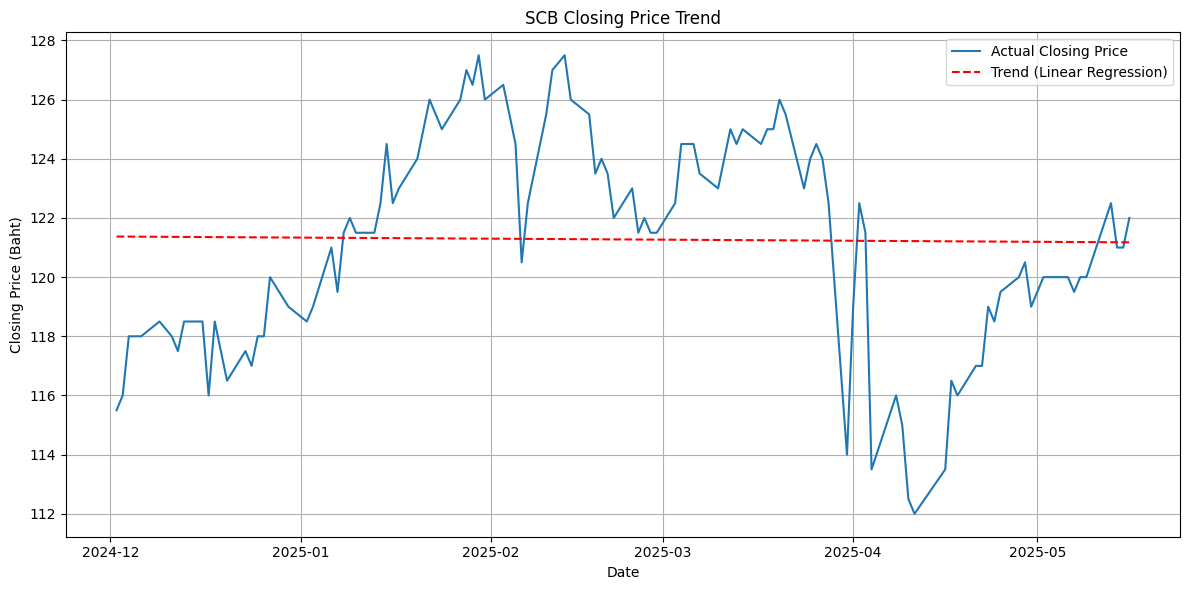

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
df_sorted = df.sort_values("วันที่")
X = df_sorted["วันที่"].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = df_sorted["ราคาปิด"].values
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["วันที่"], y, label="Actual Closing Price")
plt.plot(df_sorted["วันที่"], trend, label="Trend (Linear Regression)",
linestyle="--", color="red")
plt.title("SCB Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price (Baht)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()